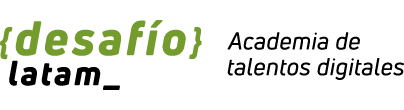

#<center><strong><font color="green">Solución Desafio - Preparación de datos y gráficos</font></strong></center>

Carga de librerias y Data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('world-data-2023.csv')

Revisamos las primeras 5 filas para observar los datos y familiarizarnos con ellos.

In [ ]:
df.head(5)

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...                           56.90%   
2            Algiers       150,006  ...                           28.10%   
3   Andorra la Vella           469  ...                           36.40%   
4             Luanda        34,693  ...                           33.40%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.168331  
2            11.70%       31,510,100  28.033886   1.659626  
3               NaN           67,873  42.506285   1.521801  
4             6.89%       21,061,025 -11.202692  17.873887  

[5 rows x 35 columns]

Revisamos si en la data existen valores nulos. La respuesta es afirmativa, ya que no hay igual cantidad de datos en todas las columnas

In [ ]:
columnas_seleccionadas = [0,1,3,4,5,6,9,10,11,13,14,15,16,17,18,19,21,22,23,25,26,27,28,29,30,31,32]
df_seleccionado = df.iloc[:, columnas_seleccionadas]
df_seleccionado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

Utilizamos pairplot para obtener los gráficos correspondientes a las variables numéricas.

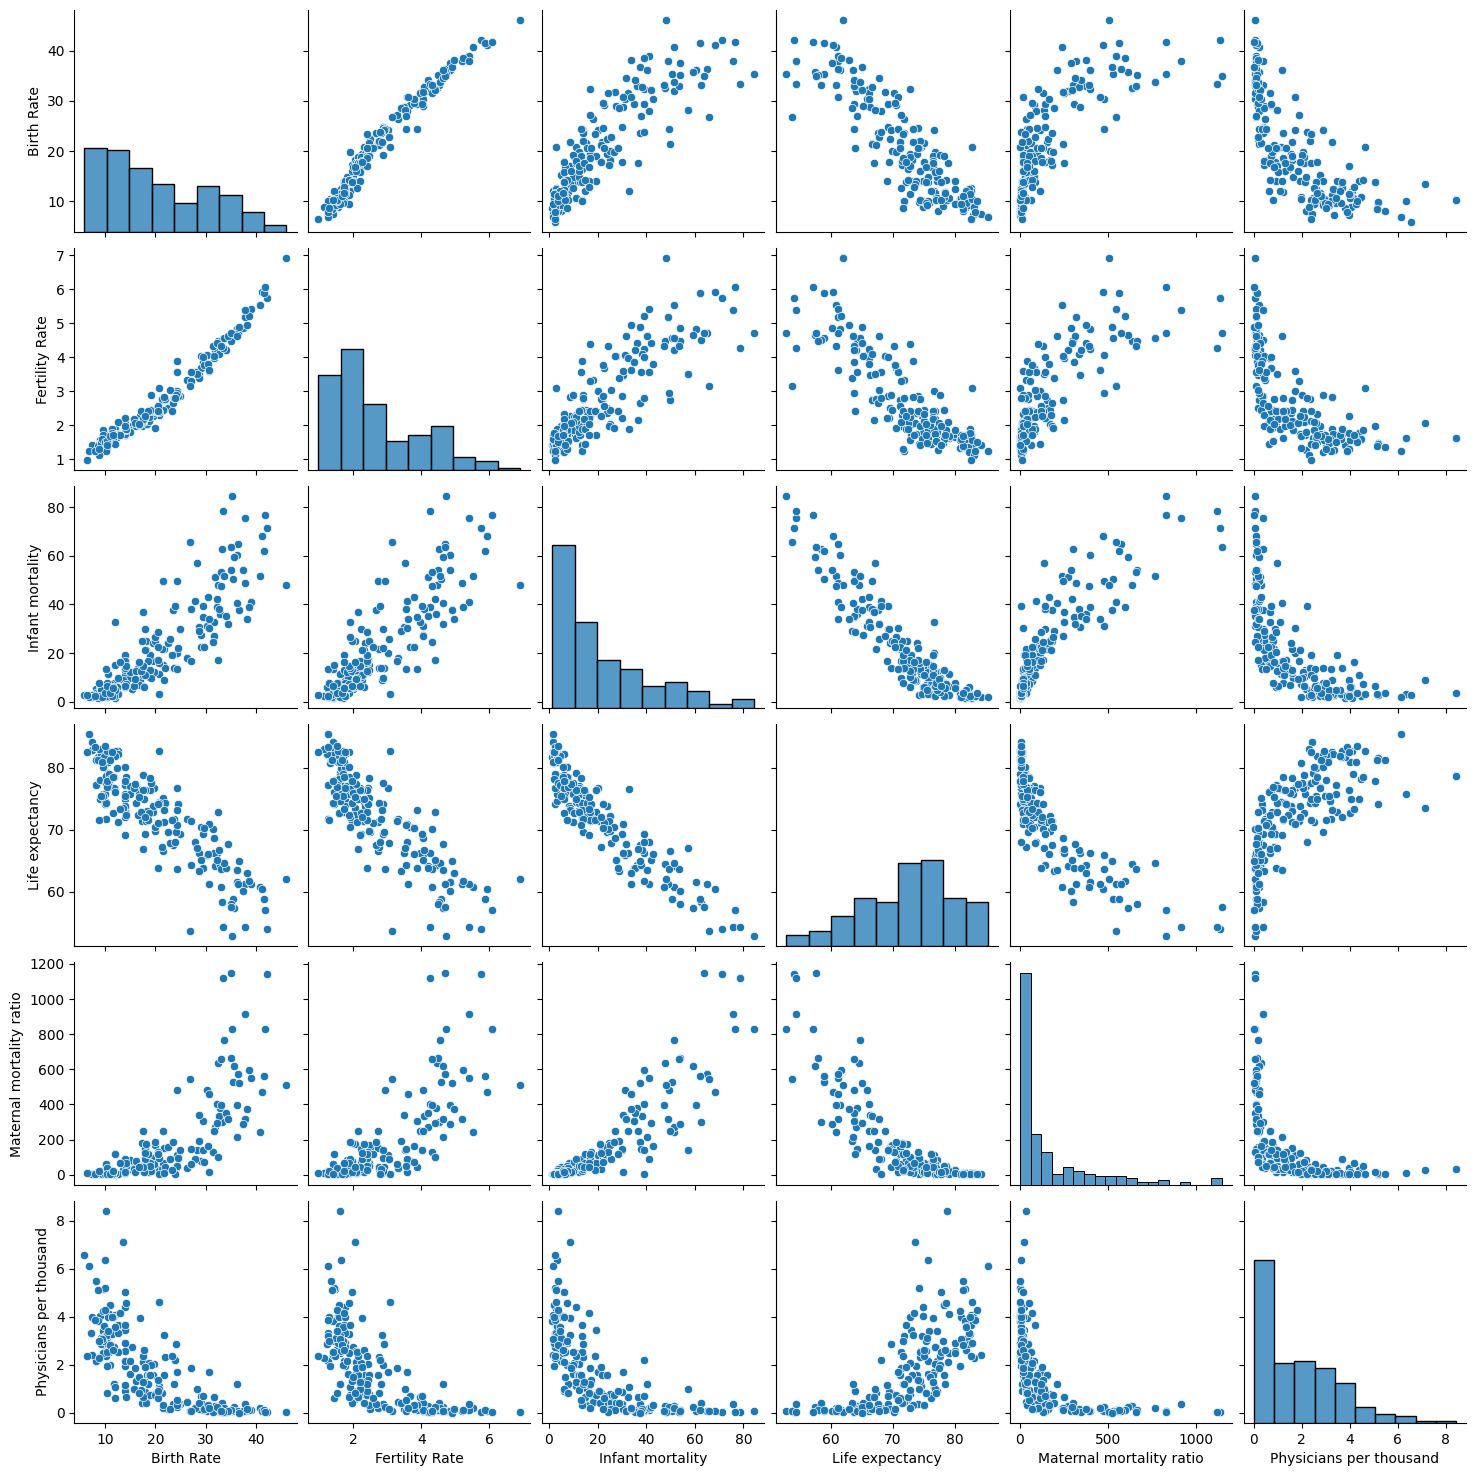

In [ ]:
sns.pairplot(df_seleccionado)

La mayor correlación se observa entre la tasa de nacidos y la tasa de fertilidad. También se observa una relación importante negativa entre la mortalidad infantil y la esperanza de vida.

Vamos a comparar la tasa de nacidos vivos y la tasa de fertilidad.

In [ ]:
columnas_compara1 = ['Birth Rate', 'Fertility Rate']
df_compara1 = df_seleccionado[columnas_compara1].dropna()

Vamos a calcular, en cada caso, los rangos intercuartiles de cada conjunto para excluir los valores atípicos. Diseñaremos una función que defina los valores atípicos, para poder reutilizarla luego

In [ ]:
def rangoInterQ(columna):
  p25=columna.quantile(0.25)
  p75=columna.quantile(0.75)
  rango=p75-p25
  limsup = p75 + rango
  liminf = p25 - rango
  condicion = ((liminf <= columna) & (columna<= limsup))
  return(condicion)

#utilizamos la condición combinada para las dos columnas
df_combina1 = df_compara1[rangoInterQ(df_compara1['Birth Rate']) & rangoInterQ(df_compara1['Fertility Rate'])]
print(df_combina1)

     Birth Rate  Fertility Rate
0         32.49            4.47
1         11.78            1.62
2         24.28            3.02
3          7.20            1.27
5         15.33            1.99
..          ...             ...
190       17.88            2.27
191       16.75            2.05
192       30.45            3.79
193       36.19            4.63
194       30.68            3.62

[182 rows x 2 columns]


Creamos ahora un scatterplot con estos datos

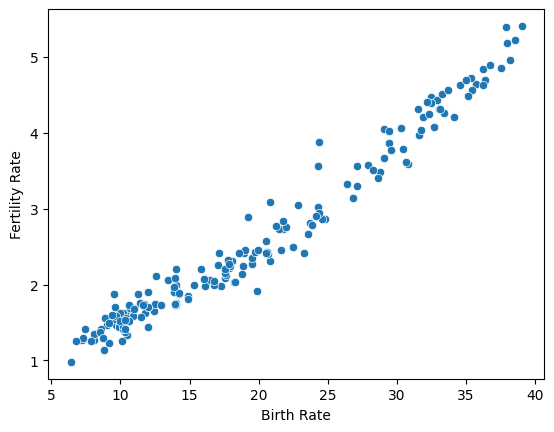

In [ ]:
sns.scatterplot(data=df_combina1, x='Birth Rate', y='Fertility Rate')

# Mostrar el gráfico
plt.show()


Vemos que, en este caso, no se observa una diferencia significativa al excluir los valores atípicos.

Veremos ahora lo que ocurre con la cantidad de médicos por cada mil personas y la esperanza de vida. Para ello realizamos el mismo análisis.


     Physicians per thousand  Life expectancy
0                       0.28             64.5
1                       1.20             78.5
2                       1.72             76.7
4                       0.21             60.8
5                       2.76             76.9
..                       ...              ...
190                     1.92             72.1
191                     0.82             75.3
192                     0.31             66.1
193                     1.19             63.5
194                     0.21             61.2

[175 rows x 2 columns]


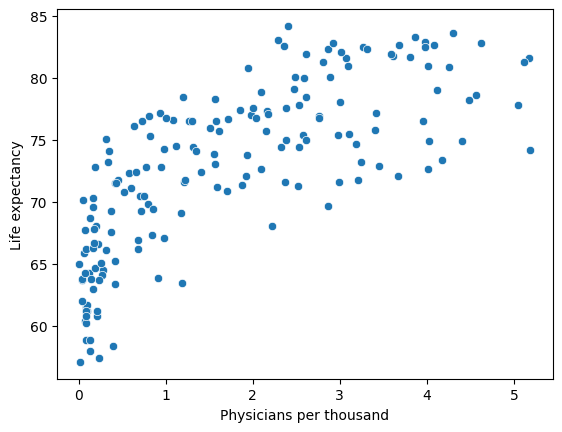

In [ ]:
columnas_compara2 = ['Physicians per thousand', 'Life expectancy']

df_compara2 = df_seleccionado[columnas_compara2].dropna()
df_combina2 = df_compara2[rangoInterQ(df_compara2['Physicians per thousand'])&rangoInterQ(df_compara2['Life expectancy'])]

print(df_combina2)

# Crear un scatter plot utilizando Seaborn
sns.scatterplot(data=df_combina2, x='Physicians per thousand', y='Life expectancy')
# Mostrar el gráfico
plt.show()


En este caso, tampoco se aprecia una diferencia sustancial.

Construiremos ahora un gráfico para la población y el producto interno bruto de los países. Lo más adecuado en este caso sería un histograma

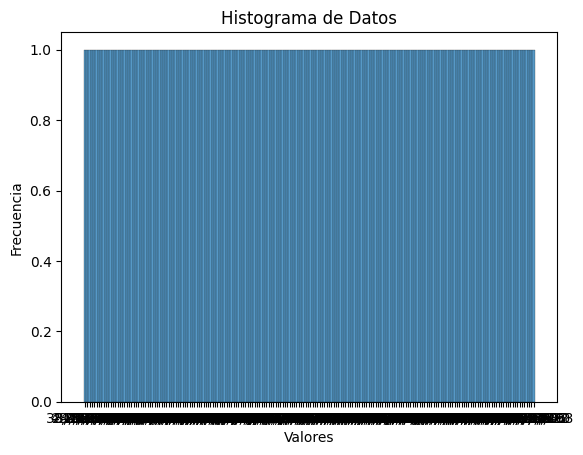

In [ ]:
data=df_seleccionado['Population'].dropna()
sns.histplot(data=data, bins=10)
# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos')

# Mostrar el gráfico
plt.show()

Podemos observar que se produce un error, ya que los datos se encuentran codificados como objeto. Para resolver esto, remplazamos en las celdas de la columna el punto por un caracter "vacío", y le damos formato float

In [ ]:
df_seleccionado['Population'] = df_seleccionado['Population'].str.replace(',', '').astype(float)

# Verificar los tipos de datos después de la conversión
print(df_seleccionado['Population'])


0      38041754.0
1       2854191.0
2      43053054.0
3         77142.0
4      31825295.0
          ...    
190    28515829.0
191    96462106.0
192    29161922.0
193    17861030.0
194    14645468.0
Name: Population, Length: 195, dtype: float64


<ipython-input-11-283996c12665>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Population'] = df_seleccionado['Population'].str.replace(',', '').astype(float)


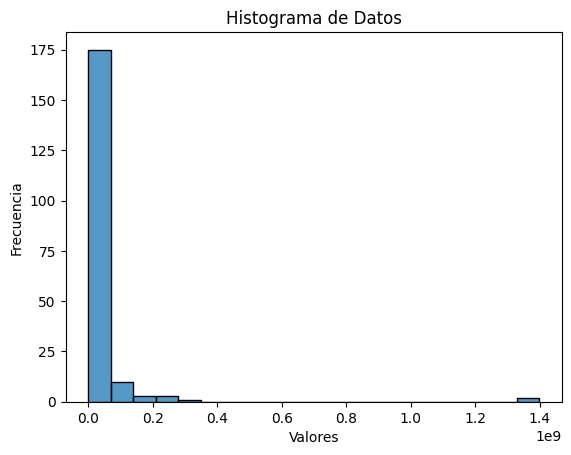

In [ ]:
poblacion=df_seleccionado['Population'].dropna()
sns.histplot(data=poblacion, bins=20)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos')

# Mostrar el gráfico
plt.show()

¿Qué problema existe? Naturalmente, que algunos países concentran una proporción muy alta de la población (como China e India). Podemos observar lo que ocurre si construimos un boxplot.



<Axes: >

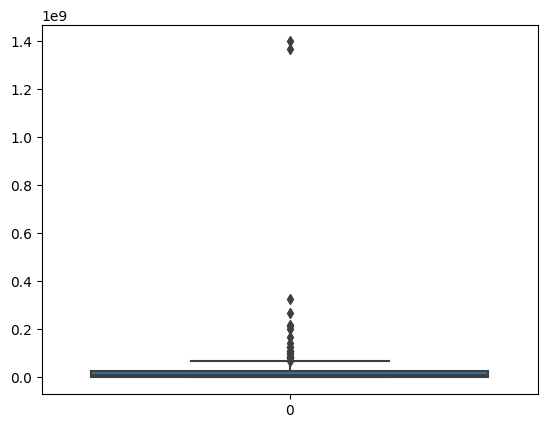

In [ ]:
sns.boxplot(data=poblacion)

Exluyendo los valores atípicos, tenemos:

0      38041754.0
1       2854191.0
2      43053054.0
3         77142.0
4      31825295.0
          ...    
189      299882.0
190    28515829.0
192    29161922.0
193    17861030.0
194    14645468.0
Name: Population, Length: 169, dtype: float64


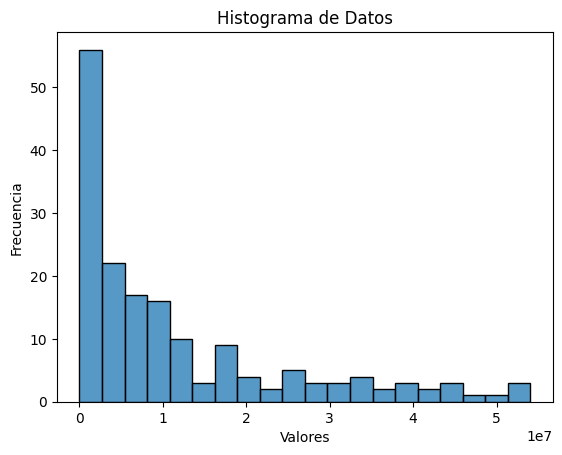

In [ ]:
df_poblacion = poblacion[rangoInterQ(poblacion)]
print(df_poblacion)

sns.histplot(data=df_poblacion, bins=20)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos')

# Mostrar el gráfico
plt.show()

Finalmente, analizaremos el producto interno bruto de manera similar a la población. Ya vimos que los datos no están con formato numérico, por lo que realizamos la conversión

<ipython-input-15-9f57a7401892>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seleccionado['GDP'] = df_seleccionado['GDP'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-15-9f57a7401892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['GDP'] = df_seleccionado['GDP'].str.replace(',', '').str.replace('$', '').astype(float)


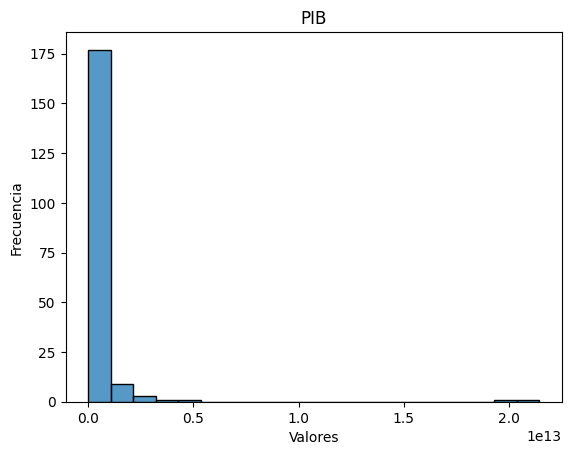

In [ ]:
df_seleccionado['GDP'] = df_seleccionado['GDP'].str.replace(',', '').str.replace('$', '').astype(float)

PIB = df_seleccionado['GDP'].dropna() #seleccionamos la columna

sns.histplot(data=PIB, bins=20)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('PIB')
# Mostrar el gráfico
plt.show()

Nuevamente, seleccionaremos los datos excuyendo los valores atípicos

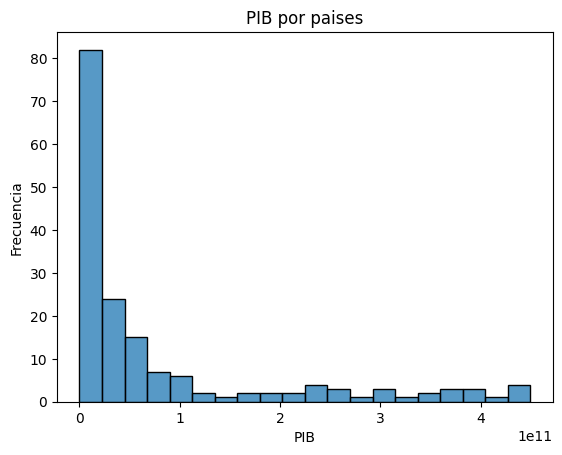

In [ ]:
df_PIB = PIB[rangoInterQ(PIB)]


sns.histplot(data=df_PIB, bins=20)

# Agregar etiquetas y título
plt.xlabel('PIB')
plt.ylabel('Frecuencia')
plt.title('PIB por paises')

# Mostrar el gráfico
plt.show()

Para la última parte, dependerá de cada estudiante según los datos que se escojan.